# Logistic Regression

Sources:  
  
https://www.stat.purdue.edu/~zhanghao/MAS/handout/Likelihood.pdf  
https://www.kdnuggets.com/2022/11/comparing-linear-logistic-regression.html  
https://math.unm.edu/~schrader/biostat/bio1/notes/lecture15.pdf  
https://online.stat.psu.edu/stat501/lesson/13/13.2  
https://www.geeksforgeeks.org/machine-learning/understanding-logistic-regression/  
https://www.geeksforgeeks.org/data-science/likelihood-function/  
https://medium.com/@robdelacruz/logistic-regression-from-scratch-7db690fb380b  
https://medium.com/@nicolasanti_43152/ml-loss-and-likelihood-e0a5ff4ae594  

For binary data $y\in\{0, 1\}$ with $p=P(y=1)$ and $1-p=P(y=0)$, the probability mass function (pmf) is:

$$
P(y, p) = 
\left\{
\begin{array}{ll}
p^y(1-p)^{1-y} & y \in {0,1} \\
0 & y \notin {0,1} 
\end{array}
\right.
$$
This is commonly reffered to as a "Bernoulli Distribution".

Given m predictors and n samples, we can arrange our predictors into an (m+1) x n matrix $X$. For cleanliness, let's make the first column vecor of $X$, $x_0$, filled with $1$s to be used with the intercept parameter.

$$
X = 
\begin{pmatrix}
1 & x_{11} & \cdots & x_{1m} \\
1 & x_{21} & \cdots & x_{2m} \\
\vdots & \vdots & \ddots & \cdots \\
1 & x_{n1} & \cdots & x_{nm}
\end{pmatrix}
$$

Each row vector, $x_i$, represents the feature values corresponding to the i'th observation, and each column vector, $x_j$, contains the predictor values for a single feature across all n samples.


In logistic regression, we want to optimize the weights in a linear combination corresponding to each feature. For each sample,

$$
z_i = x_i^\top \Theta = \sum_{j=0}^m x_{ij}\theta_j = \theta_0 + \theta_1 x_{i1} + \theta_2 x_{i2} + ... + \theta_m x_{im}
$$

To provide a probability $(0 \lt p_i \lt 1)$, we want a way to compress the above values in the linear combination into the interval $(0,1)$. We can do so using the sigmoid function:

$$
p_i = \sigma(z_i) = \frac{1}{1+e^{-z_i}} = \frac{1}{1+e^{-x_i^\top\Theta}}
$$

In [42]:
import numpy as np
import matplotlib.pyplot as plt

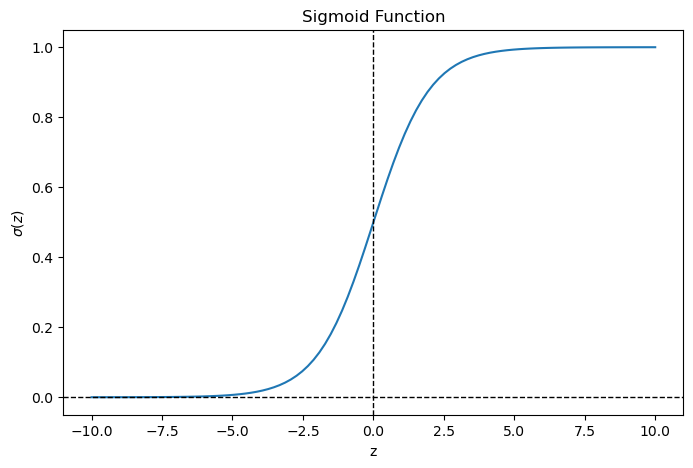

In [43]:
### Plotting sigma(z)

# Creating data
z = np.linspace(-10, 10, 100)
sigma = 1 / (1 + np.exp(-z))

# Plotting
plt.figure(figsize=(8,5))
plt.plot(z, sigma)
plt.xlabel("z")
plt.ylabel(r"$\sigma(z)$")
plt.title("Sigmoid Function")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)

Thus the odds are:

$$
\frac{P(y=1)}{P(y=0)} = \frac{p_i}{1-p_i} = \frac{\sigma(z)}{1 - \sigma(z)} = \frac{1}{1+e^{-z_i}} \cdot \left(1 - \frac{1}{1+e^{-z_i}}\right)^{-1}
$$

$$
\frac{1}{1+e^{-z_i}} \cdot \frac{1}{1 - \frac{1}{1+e^{-z_i}}} = \frac{1}{1+e^{-z_i}} \cdot \frac{1+e^{-z_i}}{1+e^{-z_i}-1} = \frac{1}{1+e^{-z_i}} \cdot \frac{1+e^{-z_i}}{e^{-z_i}}
$$

$$
= \frac{1}{e^{-z_i}} = e^{z_i} = e^{x_i^\top\Theta}
$$

And thus the log odds:

$$
\log(\frac{p_i}{1-p_i}) = \log (e^{x_i^\top\Theta}) = \sum_{j=0}^m x_{ij} \theta_j=x_i^\top \Theta
$$

For intuition, note that

$$
\lim_{p\xrightarrow{}1}\log(\frac{p}{1-p})=+\infty
$$

and 

$$
\lim_{p\xrightarrow{}0}\log(\frac{p}{1-p})=-\infty
$$

so simply put, when $x_i^\top\Theta$ is large, it indicates a high probability that $y=1$, and when very negative, a high probability that $y=0$.

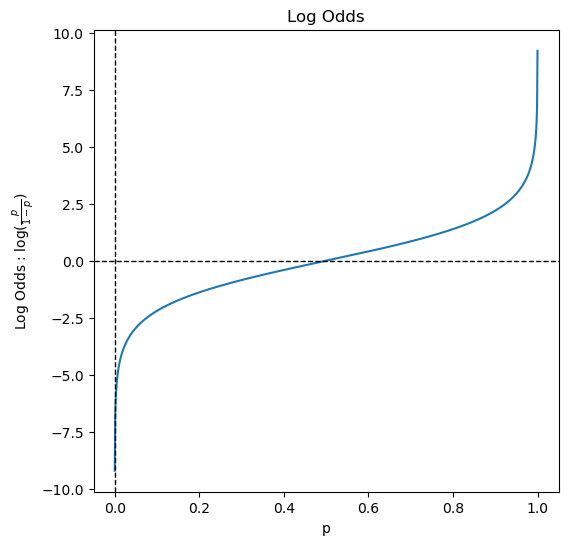

In [41]:
### Plotting log odds

# Creating data
p = np.linspace(0.0001, 0.9999, 1000)
logOdds = np.log(p / (1-p))

# Plotting
plt.figure(figsize=(6,6))
plt.plot(p, logOdds)
plt.xlabel("p")
plt.ylabel(r"Log Odds : $\log(\frac{p}{1-p})$")
plt.title("Log Odds")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)

Now, let's introduce something called the "Likelihood Function".
It is defined generally as the likelihood of the parameters given the data.

$$
L(\Theta | \text{data}) = P(\text{data} | \Theta)
$$

So, the likelihood for a binary logistic classification given n samples follows the below:

$$
L(\Theta | \mathbf{Y,X})=\prod_{i=0}^n p(y_i| \pi_i) = \prod_{i=0}^n p_i^{y_i}(1-p_i)^{1-y_i}
$$

$$
=\prod_{i=0}^n \frac{e^{x_i^T\Theta}}{1 + e^{x_i^T\Theta}}
$$


And thus the Log-Likelihood:

$$
\log L(\Theta | \mathbf{Y,X}) = \sum_{i=0}^n [y_i \log(p_i) + (1-y_i) \log(1-p_i)]
$$

When we find a maximum of the Log-Likelihood function, we have determined the values of $\Theta$ that maximizes the probability of the observed data.